### Topic Modeling Using Mallet

In [136]:
path_to_mallet = '/Users/owenmonroe/Desktop/mallet-2.0.8/bin/mallet'

In [137]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

#### Establishing Files

In [138]:
texts_directory = 'inauguration_speeches'
files = glob.glob(f"{texts_directory}/*.txt")
files

['inauguration_speeches/1961Kennedy.txt',
 'inauguration_speeches/1857Buchanan.txt',
 'inauguration_speeches/1805Jefferson.txt',
 'inauguration_speeches/2005GW_Bush.txt',
 'inauguration_speeches/1965L_Johnson.txt',
 'inauguration_speeches/1917Wilson.txt',
 'inauguration_speeches/1885Cleveland.txt',
 'inauguration_speeches/1881Garfield.txt',
 'inauguration_speeches/2013Obama.txt',
 'inauguration_speeches/1889B_Harrison.txt',
 'inauguration_speeches/1813Madison.txt',
 'inauguration_speeches/1833Jackson.txt',
 'inauguration_speeches/1973Nixon.txt',
 'inauguration_speeches/1793Washington.txt',
 'inauguration_speeches/1981Reagan.txt',
 'inauguration_speeches/2021Biden.txt',
 'inauguration_speeches/1977Carter.txt',
 'inauguration_speeches/1877Hayes.txt',
 'inauguration_speeches/1989Bush.txt',
 'inauguration_speeches/1841WH_Harrison.txt',
 'inauguration_speeches/1905T_Roosevelt.txt',
 'inauguration_speeches/1817Monroe.txt',
 'inauguration_speeches/1969Nixon.txt',
 'inauguration_speeches/1901M

#### Setting Training Data

In [139]:
training_data = []
for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)

#### Keeping Original Texts

In [140]:
original_texts = []
for file in files:
    text = open(file, encoding='utf-8').read()
    original_texts.append(text)

#### Getting Speech Titles

In [141]:
speech_titles = [Path(file).stem for file in files]
speech_titles

# this is a random order? (unsure why) Check the text editor list for doing topic distributions, but it starts at 0!

['1961Kennedy',
 '1857Buchanan',
 '1805Jefferson',
 '2005GW_Bush',
 '1965L_Johnson',
 '1917Wilson',
 '1885Cleveland',
 '1881Garfield',
 '2013Obama',
 '1889B_Harrison',
 '1813Madison',
 '1833Jackson',
 '1973Nixon',
 '1793Washington',
 '1981Reagan',
 '2021Biden',
 '1977Carter',
 '1877Hayes',
 '1989Bush',
 '1841WH_Harrison',
 '1905T_Roosevelt',
 '1817Monroe',
 '1969Nixon',
 '1901McKinley',
 '1865Lincoln',
 '1789Washington',
 '2009Obama',
 '1993Clinton',
 '1897McKinley',
 '2017Trump',
 '1825Quincy_Adams',
 '1913Wilson',
 '2001GW_Bush',
 '1837Van_Buren',
 '1925Coolidge',
 '1849Taylor',
 '1821Monroe',
 '1937F_Roosevelt',
 '1921Harding',
 '1853Pierce',
 '1869Grant',
 '1909Taft',
 '1953Eisenhower',
 '1941F_Roosevelt',
 '1957Eisenhower',
 '1801Jefferson',
 '1845Polk',
 '1949Truman',
 '1929Hoover',
 '1893Cleveland',
 '1985Reagan',
 '1809Madison',
 '1797Adams',
 '1829Jackson',
 '1997Clinton',
 '1945F_Roosevelt',
 '1873Grant',
 '1933F_Roosevelt',
 '1861Lincoln']

In [142]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 59
Mean Number of Words per Document: 1103.2
Vocabulary Size: 9025


In [143]:
num_topics = 6

In [144]:
training_data = training_data

In [145]:
#Change to your desired output directory
output_directory_path = 'output_data'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [146]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet, output_directory_path, num_topics, training_data)

Importing data...
Complete
Training topic model...


Mallet LDA: 6 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 3797
total tokens: 65089
<10> LL/token: -9.01507
<20> LL/token: -8.76707
<30> LL/token: -8.69196
<40> LL/token: -8.66624

0	0.83333	world new america nation freedom let time god know today day one people peace american together way americans make great 
1	0.83333	shall people peace national laws may upon law progress service american others men republic part business called true full use 
2	0.83333	united upon union country citizens government would one best without fellow among powers years whole administration may far much system 
3	0.83333	power people every spirit great made good government country nation force nations equal institutions free prosperity action war long self 
4	0.83333	must justice work war many nations life free history future human never still yet always right men change find people 
5	0.83333	states government public constitution congress may interests state political foreign rights execu

Complete


([['america',
   'nation',
   'new',
   'world',
   'must',
   'people',
   'let',
   'time',
   'one',
   'today',
   'american',
   'freedom',
   'americans',
   'know',
   'together',
   'god',
   'work',
   'make',
   'great',
   'day'],
  ['business',
   'must',
   'law',
   'policy',
   'congress',
   'american',
   'tariff',
   'south',
   'labor',
   'legislation',
   'make',
   'taken',
   'race',
   'hope',
   'respect',
   'citizenship',
   'education',
   'trade',
   'election',
   'secure'],
  ['constitution',
   'union',
   'one',
   'character',
   'power',
   'intercourse',
   'state',
   'executive',
   'institutions',
   'members',
   'confederacy',
   'object',
   'circumstances',
   'blessings',
   'opinions',
   'another',
   'department',
   'indeed',
   'case',
   'domestic'],
  ['limits',
   'war',
   'circumstances',
   'internal',
   'feel',
   'distant',
   'order',
   'commerce',
   'faithful',
   'virtue',
   'carried',
   'experiment',
   'enable',
   'lat

In [147]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['america', 'nation', 'new', 'world', 'must', 'people', 'let', 'time', 'one', 'today', 'american', 'freedom', 'americans', 'know', 'together', 'god', 'work', 'make', 'great', 'day']

✨Topic 1✨

['business', 'must', 'law', 'policy', 'congress', 'american', 'tariff', 'south', 'labor', 'legislation', 'make', 'taken', 'race', 'hope', 'respect', 'citizenship', 'education', 'trade', 'election', 'secure']

✨Topic 2✨

['constitution', 'union', 'one', 'character', 'power', 'intercourse', 'state', 'executive', 'institutions', 'members', 'confederacy', 'object', 'circumstances', 'blessings', 'opinions', 'another', 'department', 'indeed', 'case', 'domestic']

✨Topic 3✨

['limits', 'war', 'circumstances', 'internal', 'feel', 'distant', 'order', 'commerce', 'faithful', 'virtue', 'carried', 'experiment', 'enable', 'late', 'satisfaction', 'respect', 'talents', 'councils', 'object', 'arts']

✨Topic 4✨

['world', 'freedom', 'life', 'peace', 'nations', 'must', 'justice', 'men', 'economic', 'pu

In [148]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)


In [149]:
speech_to_check = "2017Trump"

speech_number = speech_titles.index(speech_to_check)

print(f"Topic Distributions for {speech_titles[speech_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[speech_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")

speech_number

Topic Distributions for 2017Trump

✨Topic 0 ['america', 'nation', 'new', 'world', 'must', 'people'] ✨
Probability: 0.797

✨Topic 1 ['business', 'must', 'law', 'policy', 'congress', 'american'] ✨
Probability: 0.003

✨Topic 2 ['constitution', 'union', 'one', 'character', 'power', 'intercourse'] ✨
Probability: 0.007

✨Topic 3 ['limits', 'war', 'circumstances', 'internal', 'feel', 'distant'] ✨
Probability: 0.0

✨Topic 4 ['world', 'freedom', 'life', 'peace', 'nations', 'must'] ✨
Probability: 0.027

✨Topic 5 ['government', 'people', 'upon', 'states', 'may', 'shall'] ✨
Probability: 0.165



29

In [150]:
topic_distributions[58]

[0.015815481016005693,
 0.10394185237037556,
 0.30732579149114797,
 0.0013356353633632932,
 0.0008280826843122082,
 0.5707531570747953]

In [154]:
# Early Republic
early_republic_labels = ['1789Washington', '1793Washington', '1797Adams', '1801Jefferson', '1805Jefferson', '1809Madison', 
                 '1813Madison', '1817Monroe', '1821Monroe', '1825Quincy_Adams']

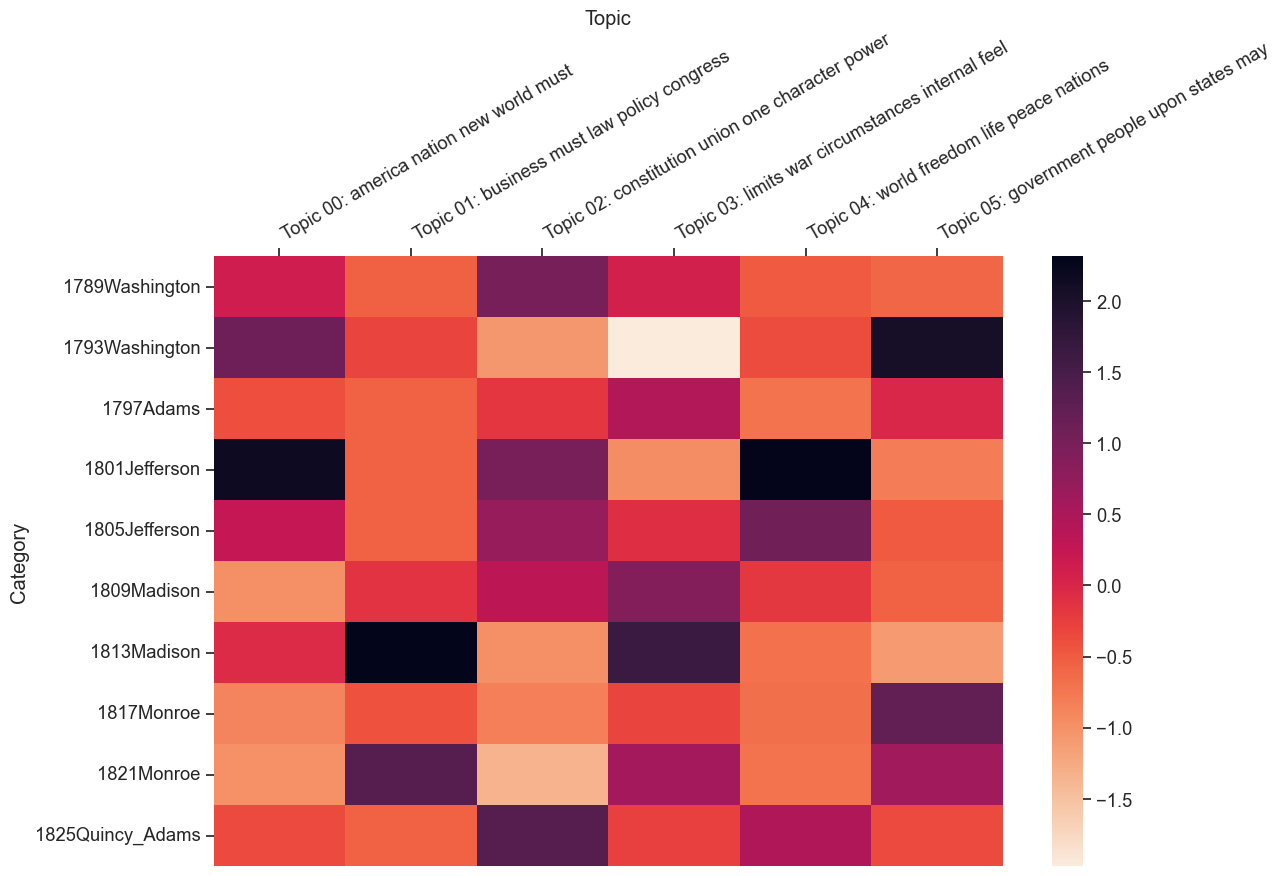

In [155]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(speech_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels= early_republic_labels,
                                      dim= (13, 9)
                                     )

In [156]:
# antebellum
antebellum_labels = ['1829Jackson', '1833Jackson', '1837Van_Buren', '1841WH_Harrison', '1845Polk', '1849Taylor', 
                     '1853Pierce', '1857Buchanan']

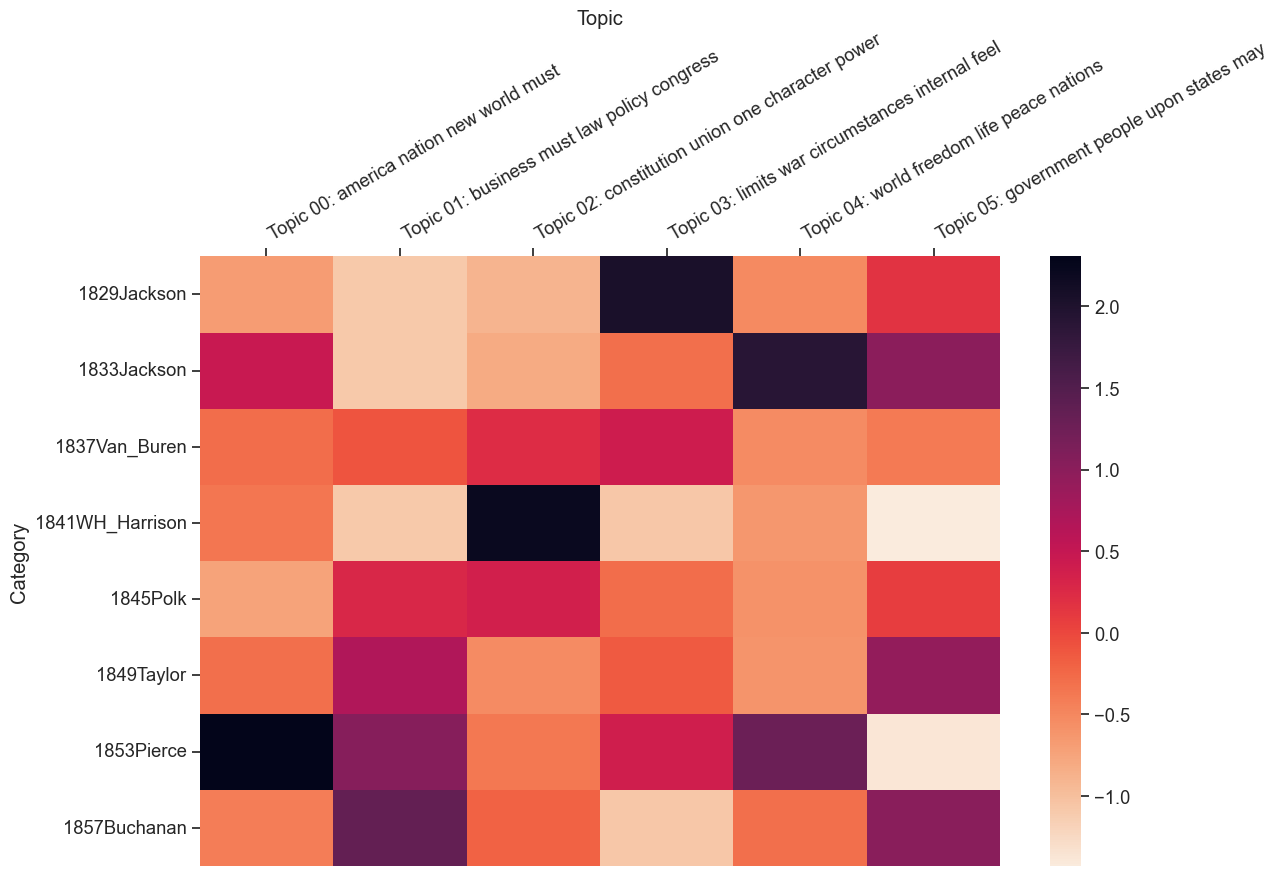

In [157]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(speech_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels= antebellum_labels,
                                      dim= (13, 9)
                                     )

In [166]:
civilwar_reconstruction_labels = ['1861Lincoln', '1865Lincoln', '1869Grant', '1873Grant', '1877Hayes']

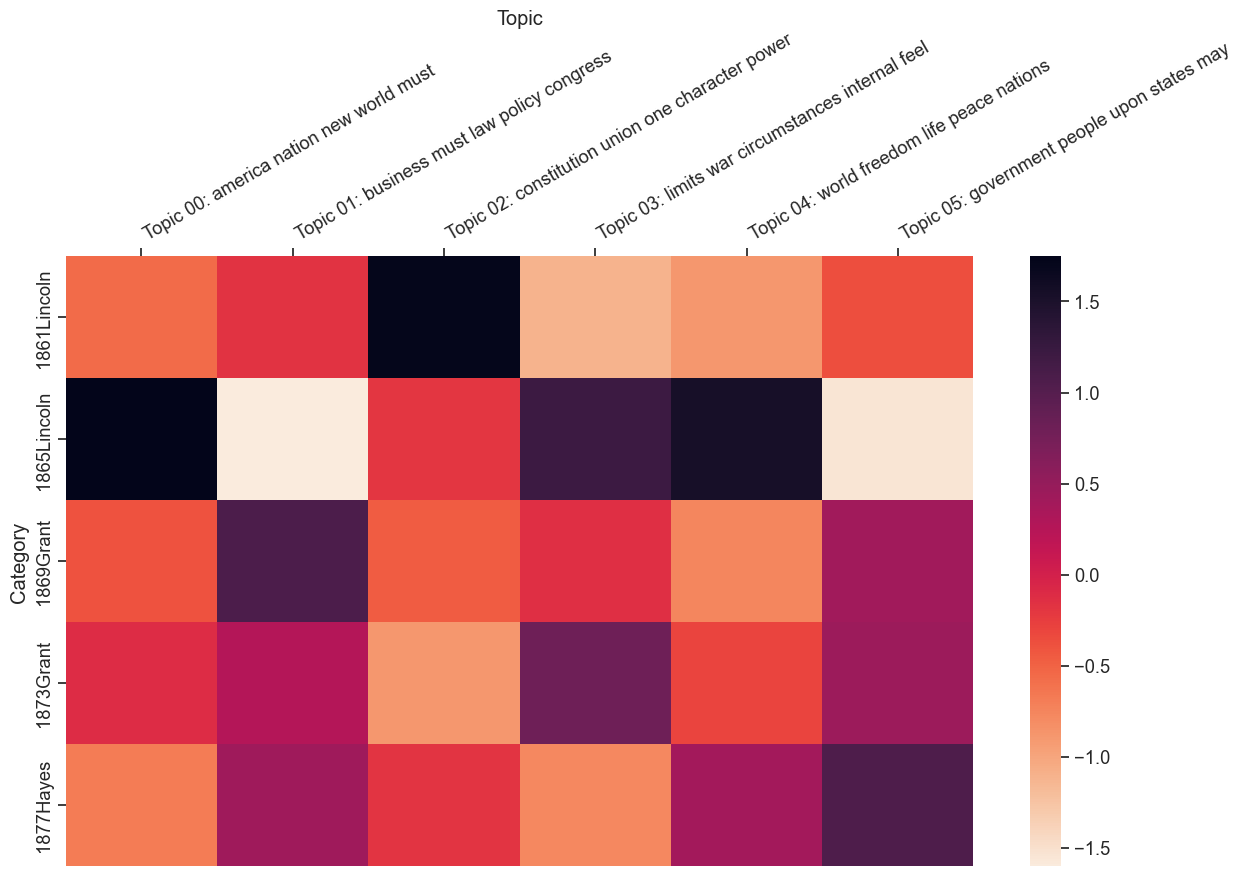

In [167]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(speech_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels= civilwar_reconstruction_labels,
                                      dim= (13, 9)
                                     )

In [168]:
guilded_age_labels = ['1881Garfield', '1885Cleveland', '1889B_Harrison', '1893Cleveland', '1897McKinley', '1901McKinley', 
                      '1905T_Roosevelt', '1909Taft', '1913Wilson', '1917Wilson', '1921Harding', '1925Coolidge', '1929Hoover']

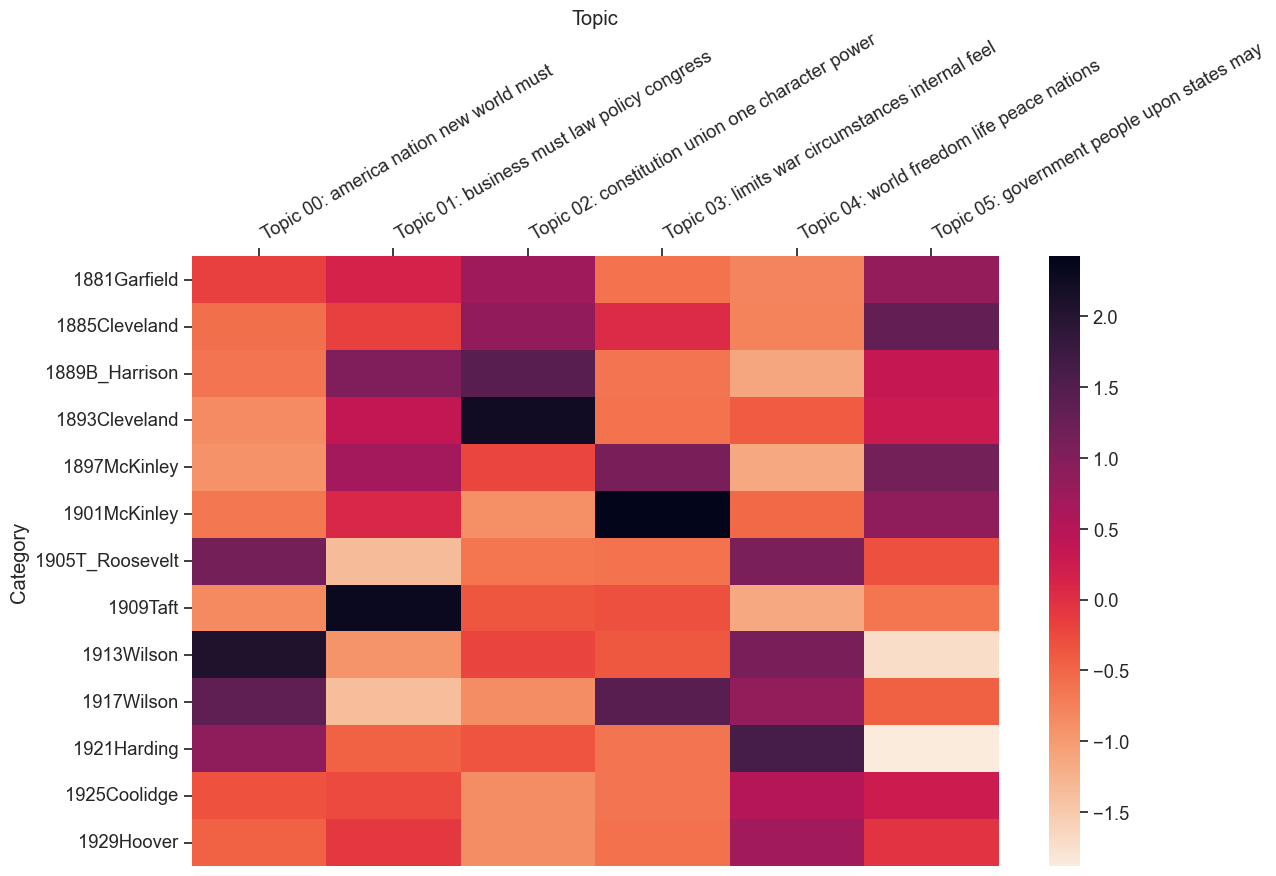

In [169]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(speech_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels= guilded_age_labels,
                                      dim= (13, 9)
                                     )

In [178]:
depression_wwii_labels = ['1933F_Roosevelt', '1937F_Roosevelt', '1941F_Roosevelt', '1945F_Roosevelt']

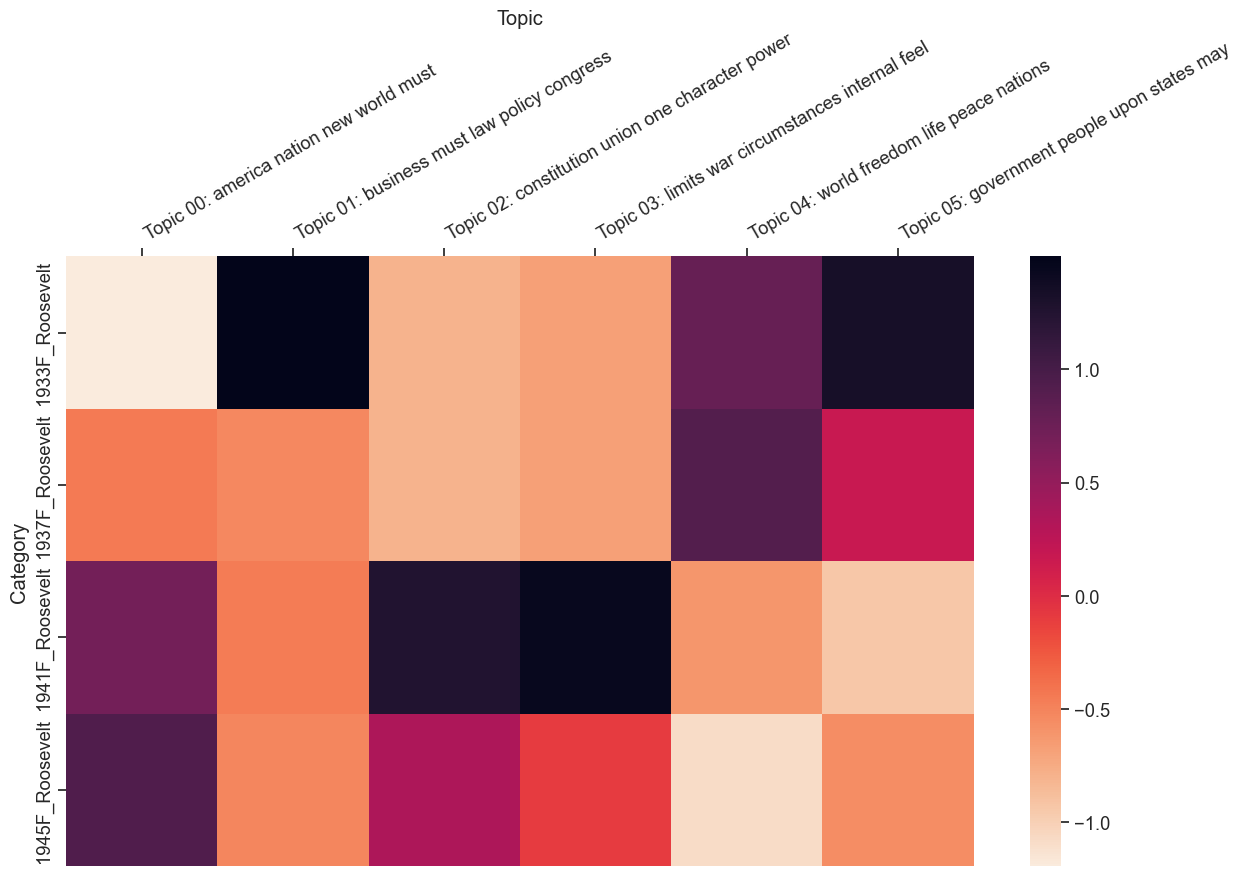

In [171]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(speech_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels= depression_wwii_labels,
                                      dim= (13, 9)
                                     )

In [172]:
postwar_labels = ['1949Truman', '1953Eisenhower', '1957Eisenhower', '1961Kennedy', '1965L_Johnson', '1969Nixon', '1973Nixon', 
                  '1977Carter', '1981Reagan', '1985Reagan', '1989Bush']

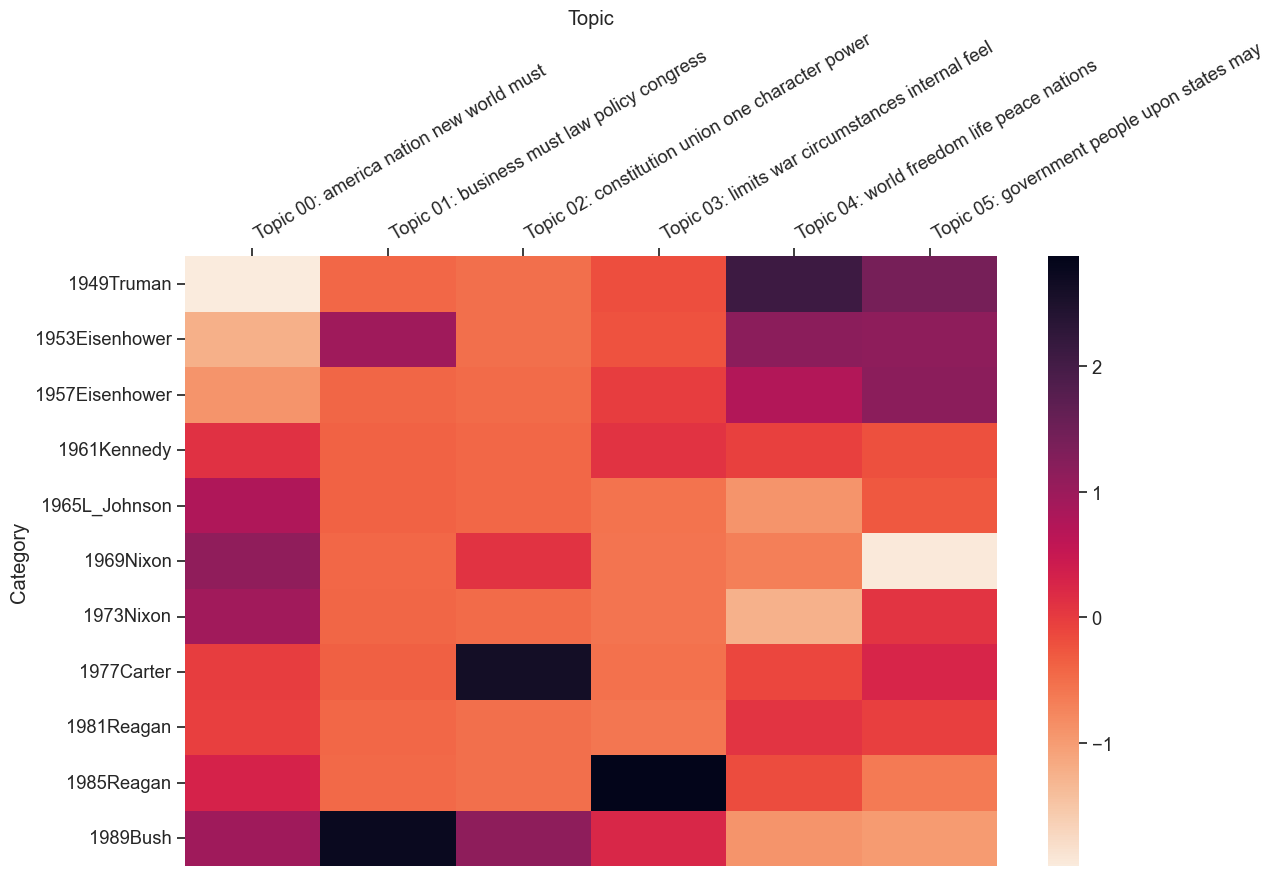

In [173]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(speech_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels= postwar_labels,
                                      dim= (13, 9)
                                     )

In [174]:
postcoldwar_labels = ['1993Clinton', '1997Clinton', '2001GW_Bush', '2005GW_Bush', '2009Obama', '2013Obama', '2017Trump', '2021Biden']

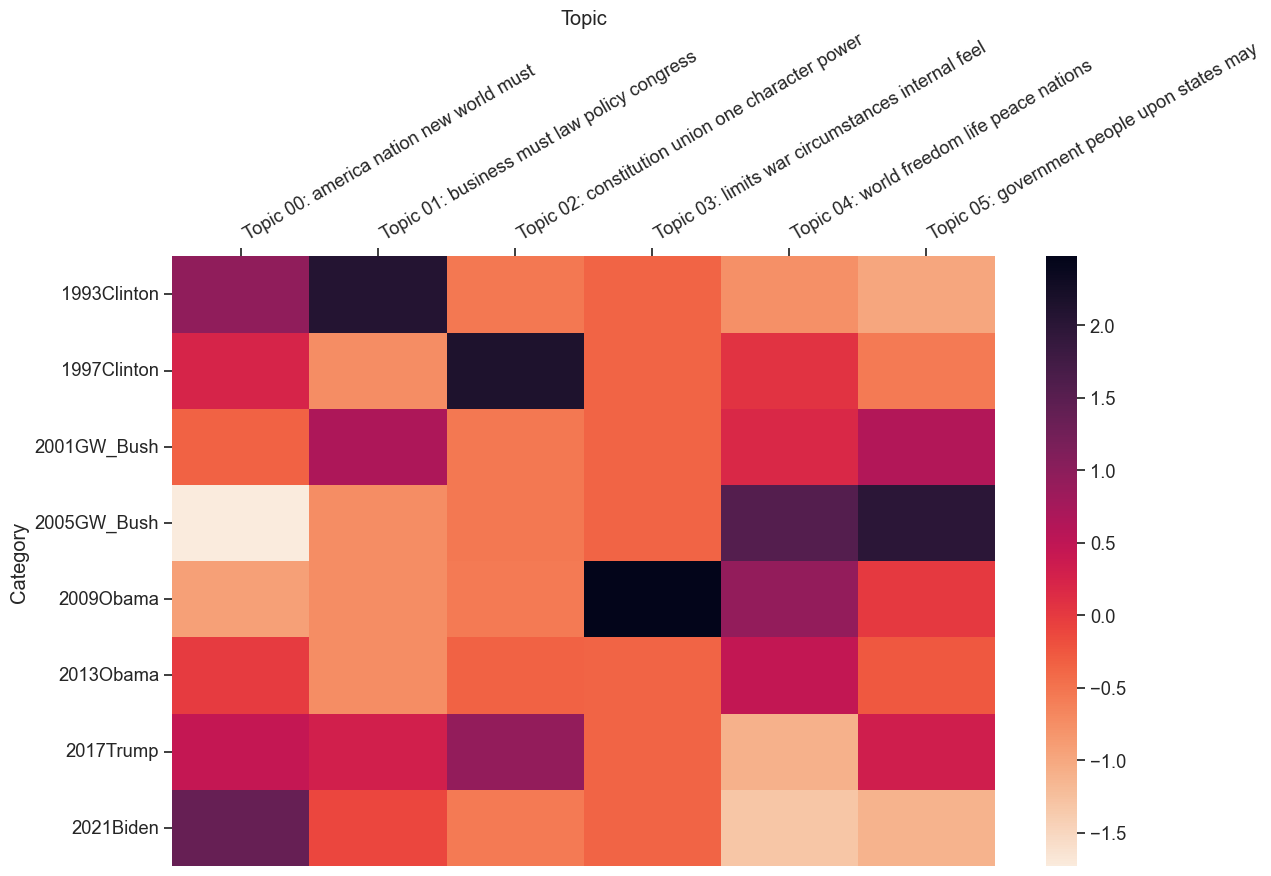

In [175]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(speech_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels= postcoldwar_labels,
                                      dim= (13, 9)
                                     )

In [186]:
all_labels = ['1789Washington', '1793Washington', '1797Adams', '1801Jefferson', '1805Jefferson', '1809Madison', 
                 '1813Madison', '1817Monroe', '1821Monroe', '1825Quincy_Adams', '1829Jackson', '1833Jackson', 
                 '1837Van_Buren', '1841WH_Harrison', '1845Polk', '1849Taylor', '1853Pierce', '1857Buchanan',
                 '1861Lincoln', '1865Lincoln', '1869Grant', '1873Grant', '1877Hayes', '1881Garfield', '1885Cleveland', 
                 '1889B_Harrison', '1893Cleveland', '1897McKinley', '1901McKinley', '1905T_Roosevelt', '1909Taft', 
                 '1913Wilson', '1917Wilson', '1921Harding', '1925Coolidge', '1929Hoover', '1933F_Roosevelt', '1937F_Roosevelt', 
                 '1941F_Roosevelt', '1945F_Roosevelt', '1949Truman', '1953Eisenhower', '1957Eisenhower', '1961Kennedy', '1965L_Johnson',
                 '1969Nixon', '1973Nixon', '1977Carter', '1981Reagan', '1985Reagan', '1989Bush', '1993Clinton', '1997Clinton', 
                 '2001GW_Bush', '2005GW_Bush', '2009Obama', '2013Obama', '2017Trump', '2021Biden']

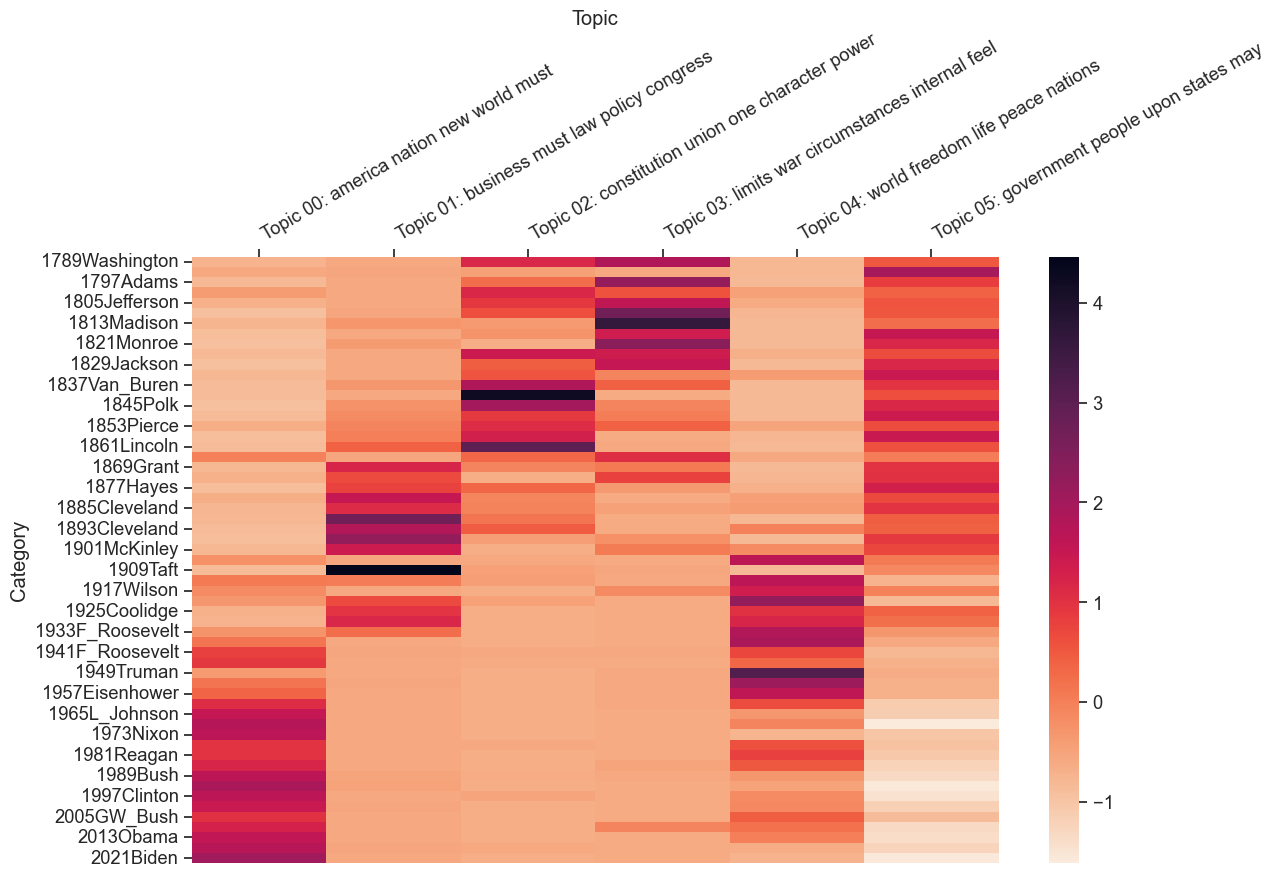

In [187]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(speech_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels= all_labels,
                                      dim= (13, 9)
                                     )